In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import keras
from skimage import io
import skimage
import matplotlib.pyplot as plt
import numpy as np

m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/4")
])
m.build([None, 224, 224, 3])  # Batch input shape.

In [ ]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4",
                   trainable=False),  # Can be True, see below.
])
m.build([None, 299, 299, 3])  # Batch input shape.


In [10]:
m = tf.keras.Sequential([
    hub.KerasLayer("imagenet_inception_v3_feature_vector_4/",
                   trainable=False),  # Can be True, see below.
])
m.build([None, 299, 299, 3])  # Batch input shape.


In [40]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_96/feature_vector/4",
                   trainable=False),  # Can be True, see below.
])
m.build([None, 96, 96, 3])  # Batch input shape.

In [62]:
m = tf.keras.Sequential([
    hub.KerasLayer("experts_bit_r50x1_in21k_substance_1/",
                   trainable=False),  # Can be True, see below.
])
m.build([None, 299, 299, 3])  # Batch input shape.


In [63]:
m.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_6 (KerasLayer)   multiple                  23500352  
Total params: 23,500,352
Trainable params: 0
Non-trainable params: 23,500,352
_________________________________________________________________


In [64]:
images = io.imread_collection("data/RGB/Resized_299/*.jpeg")

In [65]:
print(images)

['data/RGB/Resized_299/image_0.jpeg', 'data/RGB/Resized_299/image_1.jpeg', 'data/RGB/Resized_299/image_2.jpeg', 'data/RGB/Resized_299/image_3.jpeg', 'data/RGB/Resized_299/image_4.jpeg', 'data/RGB/Resized_299/image_5.jpeg', 'data/RGB/Resized_299/image_6.jpeg', 'data/RGB/Resized_299/image_7.jpeg', 'data/RGB/Resized_299/image_8.jpeg', 'data/RGB/Resized_299/image_9.jpeg', 'data/RGB/Resized_299/image_10.jpeg', 'data/RGB/Resized_299/image_11.jpeg', 'data/RGB/Resized_299/image_12.jpeg', 'data/RGB/Resized_299/image_13.jpeg', 'data/RGB/Resized_299/image_14.jpeg', 'data/RGB/Resized_299/image_15.jpeg', 'data/RGB/Resized_299/image_16.jpeg', 'data/RGB/Resized_299/image_17.jpeg', 'data/RGB/Resized_299/image_18.jpeg', 'data/RGB/Resized_299/image_19.jpeg', 'data/RGB/Resized_299/image_20.jpeg', 'data/RGB/Resized_299/image_21.jpeg', 'data/RGB/Resized_299/image_22.jpeg', 'data/RGB/Resized_299/image_23.jpeg', 'data/RGB/Resized_299/image_24.jpeg', 'data/RGB/Resized_299/image_25.jpeg', 'data/RGB/Resized_299

In [66]:
image_set = []
for image in images:
    image_set.append(image.astype("float32"))

In [67]:
type(image_set)

list

In [68]:
image_set = np.array(image_set)

In [69]:
print(image_set.shape)

(54, 299, 299, 3)


# Important Details
- Float32 type images
- Batch have to be np.array

---

### Some Euclidian Distance Application

In [70]:
predictions = m.predict(image_set)

In [71]:
print(predictions.shape)

(54, 2048)


----

# PCA Application

In [18]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [72]:
X = predictions.copy()

In [73]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [74]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.38271236 0.3576288 ]
[335.2464  324.07394]


In [75]:
X_pca = pca.transform(X)

In [76]:
X_pca.shape

(54, 2)

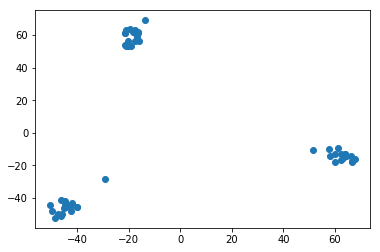

In [77]:
plt.scatter(X_pca[:,0], X_pca[:,1])

# Dİmension Reduced Data for Clustering

In [78]:
from sklearn.decomposition import PCA

In [79]:
X = predictions.copy()

In [80]:
pca = PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

In [81]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.38271227 0.35762885 0.03080001 0.02475098 0.02066435 0.01741598
 0.01466921 0.0119272  0.01063052 0.00957737]
[335.24637  324.07397   95.104996  85.25582   77.90024   71.51576
  65.63435   59.183025  55.873398  53.033592]


In [82]:
X_cluster_data = pca.transform(X)

In [83]:
X_cluster_data.shape

(54, 10)

In [84]:
X_cluster_data[4]

array([-17.105156 ,  60.43527  , -20.359007 ,  -7.7780914,  12.6688385,
        -4.5736275,   3.1973453,  -4.240553 ,  -2.6781251,  15.174748 ],
      dtype=float32)

-----

### Let's use StandartScalar to improve PCA ( It is not useful.)

X_scaled_pca = scaled_pca.transform(X)

### Let's use non-linear dimension reduction 

# Clustering

In [85]:
from sklearn.cluster import KMeans

In [86]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_cluster_data)

KMeans(n_clusters=3)

In [87]:
label = kmeans.labels_
print(label)

[0 2 1 0 2 1 0 2 1 1 2 0 1 2 0 1 2 0 2 1 0 2 1 0 1 2 0 1 2 0 1 2 0 1 2 0 1
 2 0 0 2 1 1 0 2 0 2 1 0 2 1 0 2 1]


In [88]:
kmeans.cluster_centers_.shape

(3, 10)

In [89]:
dist = kmeans.transform(X_cluster_data)

In [94]:
dist[50]

array([113.5026  ,  23.563786, 113.384766], dtype=float32)

In [90]:
min_dist = []
for ele in dist:
    min_dist.append(min(ele))

In [95]:
print(min_dist)

[31.586538, 26.958513, 26.735565, 29.83499, 30.407324, 20.019047, 31.38257, 27.069984, 33.281246, 16.872175, 36.003574, 26.278776, 10.33189, 25.783941, 31.186075, 21.850971, 26.931389, 34.29987, 24.240803, 23.277395, 20.307766, 30.98069, 16.189085, 32.64486, 22.158897, 31.087177, 18.075714, 26.842003, 28.497211, 20.10785, 12.885152, 30.00848, 38.315254, 16.47047, 23.65197, 29.853333, 11.312709, 26.05501, 33.602062, 58.382103, 31.768167, 11.237835, 16.096151, 30.232395, 52.818882, 32.192368, 43.91218, 11.652618, 31.715647, 18.288803, 23.563786, 33.75507, 22.420593, 10.285094]


- We can say that, length have to be smaller than 13.

In [96]:
def IsMemberofCluster(feature_data, kmeans = kmeans):
    '''
    It checks, new data is member of any cluster or not?
    '''
    row,col = feature_data.shape
    
    # It begin with false. If it is member of any cluster, it will return true.
    imc = []
        
    distances = kmeans.transform(feature_data)
    print(distances)
    
    for vector in distances:
        if np.all(vector > 40):
            imc.append(False)
            continue
        imc.append(True)
        
    return imc

In [101]:
imgs = io.imread_collection("test/test299/*.jpeg")

In [102]:
print(imgs)

['test/test299/image_0.jpeg', 'test/test299/image_1.jpeg', 'test/test299/image_2.jpeg', 'test/test299/image_3.jpeg', 'test/test299/image_4.jpeg', 'test/test299/image_5.jpeg', 'test/test299/image_6.jpeg', 'test/test299/image_7.jpeg', 'test/test299/image_8.jpeg', 'test/test299/image_9.jpeg', 'test/test299/image_10.jpeg', 'test/test299/image_11.jpeg', 'test/test299/image_12.jpeg', 'test/test299/image_13.jpeg', 'test/test299/image_14.jpeg']


In [103]:
test_imgs = []
for img in imgs:
    test_imgs.append(img.astype("float32"))

In [104]:
test_imgs = np.array(test_imgs)
test_imgs.shape

(15, 299, 299, 3)

In [105]:
test_features = m.predict(test_imgs)

In [106]:
test_features[-1]

array([0.02164895, 0.        , 0.8214061 , ..., 0.2881187 , 2.5742025 ,
       0.0784117 ], dtype=float32)

In [107]:
pca.explained_variance_ratio_

array([0.38271227, 0.35762885, 0.03080001, 0.02475098, 0.02066435,
       0.01741598, 0.01466921, 0.0119272 , 0.01063052, 0.00957737],
      dtype=float32)

In [108]:
test_feature_data = pca.transform(test_features)

In [109]:
print(test_features[-1])

[0.02164895 0.         0.8214061  ... 0.2881187  2.5742025  0.0784117 ]


In [110]:
pca.explained_variance_ratio_

array([0.38271227, 0.35762885, 0.03080001, 0.02475098, 0.02066435,
       0.01741598, 0.01466921, 0.0119272 , 0.01063052, 0.00957737],
      dtype=float32)

In [111]:
label = IsMemberofCluster(test_feature_data)

[[ 86.59669   75.919205  54.265106]
 [ 87.42893   78.0523    60.118267]
 [ 85.98633   79.42747   47.841328]
 [ 82.88507   74.73998   54.796913]
 [ 85.94252   76.970535  58.56051 ]
 [ 94.22423   37.587685  93.13344 ]
 [ 91.89607   40.103535  88.773834]
 [ 94.61603   34.148567  91.35463 ]
 [ 93.17061   33.71371   93.58443 ]
 [ 96.48648   32.210014  94.61304 ]
 [ 51.024265  89.8938    96.48967 ]
 [ 52.044125  95.30315  101.33499 ]
 [ 52.932663  92.6334    98.58799 ]
 [ 51.803425  96.961174  96.29036 ]
 [ 52.482365  91.22961   89.42978 ]]


In [112]:
print(label)

[False, False, False, False, False, True, False, True, True, True, False, False, False, False, False]


-----

# Let's Add New Cluster

In [157]:
### Main Add Cluster###

# let's select new image that is not in any cluster.

imag = io.imread("test/test299/image_11.jpeg")
imag = imag.astype("float32")
imag1 = skimage.transform.rotate(imag,90)
imag2 = skimage.transform.rotate(imag,180)
imag3 = skimage.transform.rotate(imag,270)
# We add all versions of image in the list.
image_list = [imag, imag1, imag2, imag3]

In [158]:
# Let's prepare list to model
image_list = np.array(image_list)

# Let's use model to extract feature vector
image_features = m.predict(image_list)
image_features.shape

(4, 2048)

In [159]:
# Now let's reduce their dimensions with PCA model.
pca_image_features = pca.transform(image_features)

# Lets check are they member of any cluster?
flags = IsMemberofCluster(pca_image_features, kmeans=kmeans)
print(flags)

[[100.14493  105.864334  60.415073  83.8575  ]
 [101.62233  105.17668   58.68776   83.95134 ]
 [100.626274 105.18971   60.29047   83.4413  ]
 [101.26881  104.75979   57.576088  83.58736 ]]
[False, False, False, False]


In [160]:
if np.any(flags):
    # We found which ones can be in cluster.
    # Now,  lets find which cluster include this image.
    
    index = flags.index(True)
    print(index)
    
    cluster = kmeans.predict(pca_image_features[index].reshape(1,-1))
    print("This image is in {} cluster".format(cluster))

In [161]:
X = np.concatenate((X,image_features),axis=0)
X.shape

(62, 2048)

In [162]:
flags = np.array(flags)
if np.all(flags == False):
    # In this case, we have to think new cluster.
    
    
    # Firstly, update PCA.
    pca = PCA(n_components=10)
    pca.fit(X)
    print(pca.explained_variance_ratio_)
    print(pca.singular_values_)
    X_cluster_data = pca.transform(X)
    
    # Fit new kmean.
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(X_cluster_data)
    label = kmeans.labels_
    print(label)
    
    
    # Find new cluster

[0.3218796  0.30115217 0.11606267 0.05149746 0.02378617 0.019811
 0.01643434 0.01216828 0.0117343  0.00954093]
[342.28995  331.0857   205.53874  136.91162   93.04858   84.91817
  77.34346   66.55213   65.35457   58.930866]
[1 2 0 1 2 0 1 2 0 0 2 1 0 2 1 0 2 1 2 0 1 2 0 1 0 2 1 0 2 1 0 2 1 0 2 1 0
 2 1 1 2 0 0 1 2 1 2 0 1 2 0 1 2 0 4 4 4 4 3 3 3 3]
